In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

  I first begin by writing a for loop the computes the discrete fourier transform using complex numbers. the code takes in a real signal and then returns a complex function with respect to frequencies. The real value corresponds to the magnitude of a sine wave and the imaginary corresponds to a cosine wave of a given frequency. I used the same implementation that we used in the exoplanets assignment however, I keep the sum at each frequency as a complex number and store the real and imaginary componenets in separate arrays for plotting purposes. I do this because later, when I computer the inverse DFT, I can just use the complex values as they are. 

 I also included coded that calculates the real and imaginary componenes seperately without using complex numbers for debugging purposes, however, it can serve as a way to intuitively understand that the Fourier transform is basically multiplying the signal with a wave of a known frequency and then measuring the response with a sum.

  I test this code by inputting a signal I generate by adding a sine wave of frequency 5 hz and a cosine wave of frequency 2 hz. I know that the DFT is working as intended because I am getting peaks where f=5 and f=2 in the frequency domain graph. I make sure to have the signal last for 10 seconds so that I know that there is a sufficient number of wavelengths in the sample for there to be noticable and narrow peaks at 2 and 5 hz. 

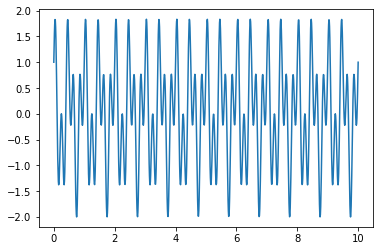

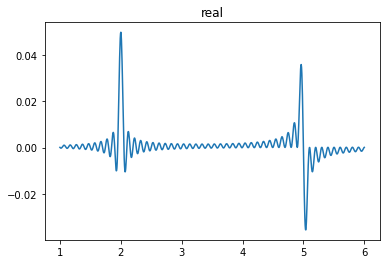

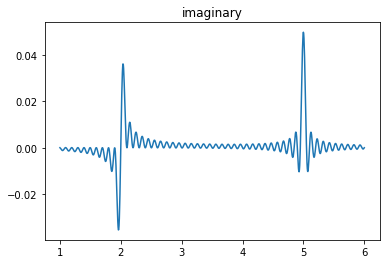

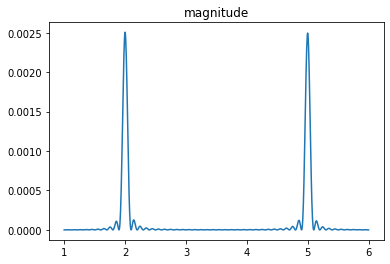

In [ ]:
endTime = 10
t = np.linspace(0,endTime, num=1000)
# print(t)
x = np.array(np.sin(t*2*np.pi*5))
y = np.array(np.cos(t*2*np.pi*2))
mix = y + x
plt.plot(t,mix)
plt.show()


#pick frequency range that contain 2 and 5 in them, I don't want this range to be too long 
#or else there won't be enough omegas sampled near 2 and 5 hz to clear make out the peaks 
omega_max = 2 * np.pi * 6 
omega_min = 2 * np.pi * 1
number_omegas = 1000

omega = np.linspace(omega_min,omega_max,number_omegas)
real = []
imaginary = []
mag = []
compl = []
# cos_sums = []
# sin_sums = []

for o in omega:
  FT_integral = 0 + 0j
  # cos_sum = 0
  # sin_sum = 0
  for i in range(0, len(t)):
      # cos_sum += mix[i] * np.cos(o * t[i])
      # sin_sum += mix[i] * np.sin(o * t[i])
      FT_integral += mix[i]*np.exp(1j * o * t[i]) 
  # cos_sums.append(cos_sum / (len(t) * endTime))
  # sin_sums.append(sin_sum / (len(t) * endTime))
  FT_integral = FT_integral / ((len(t) * endTime) )

  compl.append(FT_integral)
  real.append(FT_integral.real)
  imaginary.append(FT_integral.imag)
  mag.append(abs(FT_integral))

compl = np.array(compl)
real = np.array(real)
imaginary = np.array(imaginary)
mag = np.array(mag)
freq = omega/ (2*np.pi)
# sin_sums = np.array(sin_sums)
# cos_sums = np.array(cos_sums)

plt.plot(freq, real)
plt.title("real")
plt.show()
# plt.plot(freq, cos_sums)
# plt.title("cos")
plt.show()
plt.plot(freq, imaginary)
plt.title("imaginary")
plt.show()
# plt.plot(freq, sin_sums)
# plt.title("sin")
plt.show()
plt.plot(freq, mag**2)
plt.title("magnitude")
plt.show()

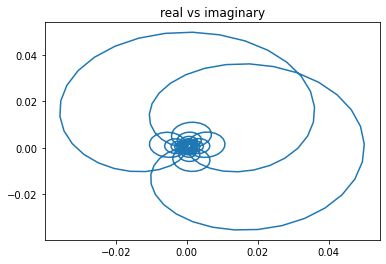

In [ ]:
#This is just a plot of the real component of the Fourier transforms vs the imaginary component
plt.title("real vs imaginary")
plt.plot(real, imaginary)

In this next section, I take the output of the previous DFT and then compute the inverse DFT to get back the original signal that we put in. The inverse DFT essentially follows the same math as the DFT, the only difference is that instead of inputing a function with respect to time, we are inputting a function with respect to frequency. And the real component of the output should give us the original wave. 

I also have the inverse DFT written in terms of cosine and sine as I was debugging, but I think that this serves as a more intuitive way of showing what we are trying to do the for loop. 

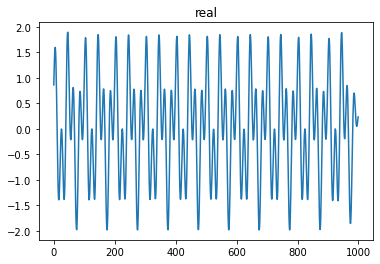

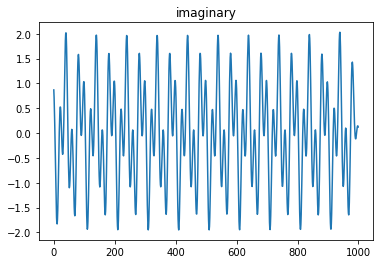

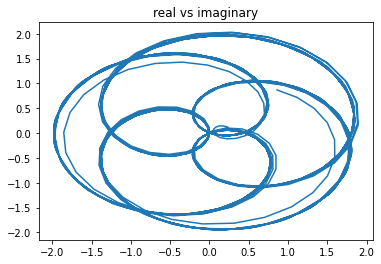

In [ ]:
output = np.zeros(len(t), dtype = 'complex_')

for f in range(0, len(freq)):
  FT_integral = 0 + 0j
  for i in range(0, len(t)): 
      # output[i] += cos_sums[f] * np.cos(2 * np.pi * freq[f] * t[i])
      # output[i] += sin_sums[f] * np.sin(2 * np.pi * freq[f] * t[i])

      output[i] += compl[f] * np.exp(-1j * 2*np.pi * freq[f] * t[i])

  # FT_integral = FT_integral / np.sqrt(2 * np.pi)
oreal = np.array(output)
# for i in range(0, len(oreal)):
  # oreal[i] = output[i].real 

# plt.plot(t, output)
# plt.show()

# we have to take the real and imaginary components seperately in order to graph them
x = [ele.real for ele in output]
y = [ele.imag for ele in output]
plt.plot(x)
plt.title("real")
plt.show()
plt.plot(y)
plt.title("imaginary")
plt.show()
plt.title("real vs imaginary")
plt.plot(x,y)
plt.show()

In order to make a Fourier Epicycle, we first need the input "signal" which, in this case will be a closed loop in 2 dimensions. There are two approaches to Fourier Epicycles that I came accross. In one approach, we take all of the x and y coordinates of a path along the loop and then seperately compute the fourier transform of these two paths. The inverse DFT would then result in two seperate epicycles whose real components would correspond to the x and y coordinates of the path tracing it out kind of like an etch-a-sketch. This website shows what that would look like: https://www.myfourierepicycles.com/

For my approach however, I wanted there to be one single epicycle series to trace the shape as shown in this video at 14:06 https://www.youtube.com/watch?v=r6sGWTCMz2k&ab_channel=3Blue1Brown

In order to do this we work entirely in complex coordinates, storing the path of the signal, which in this case will be a square centered at the origin, as an array of complex values. We can then take the DFT of this complex signal, with the same methods described above, to get the frequency domain of the square. Although I am no longer working with a simulated sound wave like previously, I will still use similar language simply because it makes more sense for me to relate it to the previous part

I mainly chose to do a square because it was the simplest shape I could make in an array that wasn't a circle. If I were to spend more time, I would try to create more complex shapes or even make it so that I could draw a shape with a cursor

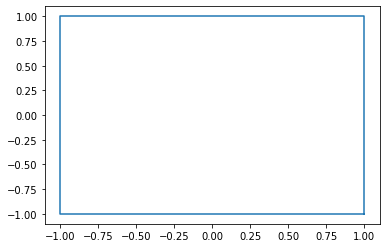

400


In [ ]:
#making the square that we will take the Fourier transform of 
x = np.linspace(-1,1, 100)

pathx = []
pathy = []
for i in x:
  pathx.append(1)
  pathy.append(i)
for i in x:
  pathx.append(-i)
  pathy.append(1)
for i in x:
  pathx.append(-1)
  pathy.append(-i)
for i in x:
  pathx.append(i)
  pathy.append(-1)
plt.plot(pathx,pathy)
plt.show()
print(len(pathx))

In [ ]:
# convert square into complex numbers
complexPath = np.zeros(len(pathx), dtype="complex_")
for i in range(0,len(pathx)):
  complexPath[i] = pathx[i] + pathy[i] * 1j


highest frequency measured: 415.0
lowest frequency measured: 385.00000000000006
number of omegas: 55


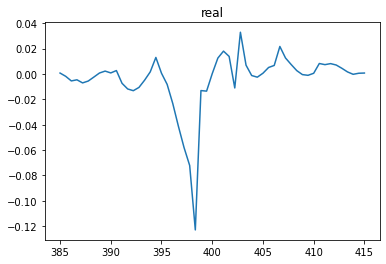

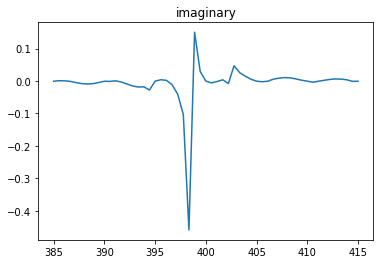

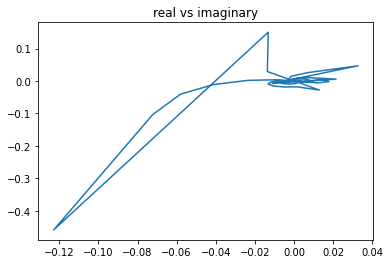

In [ ]:
endTime = 2  #endTime is how many times we want to loop around the square in the DFT
             #my thought proccess was that the more we loops we do around the square in the DFT integral, 
             #the more accurate the signal would be, however this did not seem to be the case

points = 400 * endTime  #the numbers of points in the square times number of loops to get the size of the times array
t = np.linspace(0,endTime, num=points)

#the number of omegas corresponds to the number of rotating vectors that will be used to reconstruct the image
#I played around with the values of endTime and the range of omegas sampled to get this number as low as possible
#while still being able to make out a square in the final image
omega_max = 2 * np.pi * 415 
omega_min = 2 * np.pi * 385
number_omegas = 55


print("highest frequency measured: " + str(omega_max / (2*np.pi)))
print("lowest frequency measured: " + str(omega_min / (2*np.pi)))
print("number of omegas: " + str(number_omegas))
omega = np.linspace(omega_min,omega_max,number_omegas)

compl = []

for o in omega:
  FT_integral = 0 + 0j
  for i in range(0, len(t)):
      
      FT_integral += complexPath[i % len(complexPath)]*np.exp(1j * o * t[i]) 
 
  FT_integral = FT_integral / ((len(t) * endTime) )

  compl.append(FT_integral)
 

compl = np.array(compl)

freq = omega/ (2*np.pi)

x = [ele.real for ele in compl]
y = [ele.imag for ele in compl]
plt.plot(freq, x)
plt.title("real")
plt.show()
plt.plot(freq, y)
plt.title("imaginary")
plt.show()
plt.title("real vs imaginary")
plt.plot(x,y)
plt.show()


For the final part, I copied the code for the inverse DFT. Because we started off with a complex signal, we need to graph the real components agains the imaginary components to be able to see the square again.

(-0.24465113456532614-0.42033530745321634j)


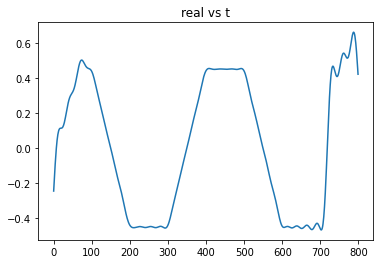

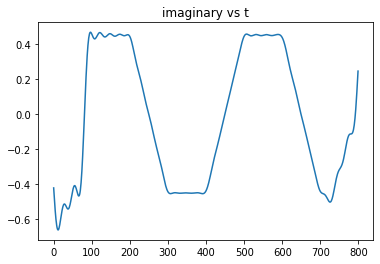

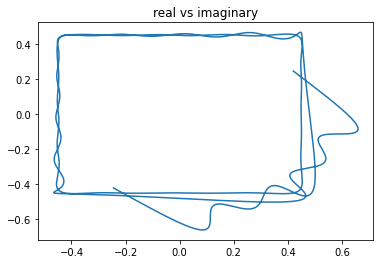

In [ ]:
output = np.zeros(len(t), dtype = 'complex_')
# print(type(np.exp(-1j * 2*np.pi * f * t[i])))
for f in range(0, len(freq)):
  FT_integral = 0 + 0j
  for i in range(0, len(t)): 
      # output[i] += cos_sums[f] * np.cos(2 * np.pi * freq[f] * t[i])
      # output[i] += sin_sums[f] * np.sin(2 * np.pi * freq[f] * t[i])

      # output[i] += imaginary[f] * np.sin(2 * np.pi * freq[f] * t[i])
      output[i] += compl[f] * np.exp(-1j * 2*np.pi * freq[f] * t[i])
print(output[0])
  # FT_integral = FT_integral / np.sqrt(2 * np.pi)
oreal = np.array(output)
# for i in range(0, len(oreal)):
  # oreal[i] = output[i].real 

# plt.plot(t, output)
# plt.show()


x = [ele.real for ele in output]
y = [ele.imag for ele in output]
plt.plot(x)
plt.title("real vs t")
plt.show()
plt.plot(y)
plt.title("imaginary vs t")
plt.show()
plt.title("real vs imaginary")
plt.plot(x,y)
plt.show()

The final real vs imaginary graph is what results from the sum of 55 rotating vectors with frequencies ranging from 385 to 415 hz. In order to optimize for the smallest number of omegas, I ran a DFt for 1000 omegas with a broad range of frequencies. The frequency domain graph showed that the peaks were clustered in the 385 to 415 hz range. I then limited the omega max and omega min to this range and saw that I was still able to make out the square. I then reduced the number of omegas. 55 was the smallest number of omegas I could use while still getting a recognizable square. I am sure that my settings could be further optimized to less than 55 epicycles considering the simplicity of the shape I am trying to recreate.  

I wasn't able to figure out how to animate 55 rotating vectors to show it tracing out this pattern, so I included code below that shows the function that traces out this specific shape as you go from t=0 to t=2.

In [ ]:
print("f(t) = ")
for i in range(0,len(compl)):
  if i != 0:
    print("+")
  print(str(compl[i]) + "e^(2*pi*i*t*" + str(freq[i]) + ")")

f(t) = 
(0.0006654237927485228-0.0006654237927488377j)e^(2*pi*i*t*385.00000000000006)
+
(-0.0018993897544479557+0.0008856999883195999j)e^(2*pi*i*t*385.55555555555554)
+
(-0.005535209661089684+0.0004842680955846132j)e^(2*pi*i*t*386.11111111111114)
+
(-0.0046592772435597625-0.0012484495747246947j)e^(2*pi*i*t*386.6666666666667)
+
(-0.00710085700781267-0.0049720736046246355j)e^(2*pi*i*t*387.2222222222223)
+
(-0.00563866098556872-0.008052842447239354j)e^(2*pi*i*t*387.7777777777778)
+
(-0.0024946450441028045-0.009310142051441138j)e^(2*pi*i*t*388.3333333333333)
+
(0.0007046076694230191-0.008053702514442604j)e^(2*pi*i*t*388.8888888888889)
+
(0.0022018858935167864-0.0047219595368194756j)e^(2*pi*i*t*389.44444444444446)
+
(0.0007620952099003527-0.0007620952099012171j)e^(2*pi*i*t*390.00000000000006)
+
(0.0026187202353080857-0.0012211293002886321j)e^(2*pi*i*t*390.5555555555556)
+
(-0.007431264226061719+0.0006501513754448319j)e^(2*pi*i*t*391.1111111111111)
+
(-0.011873453286611393-0.0031814822195204

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML
params = {
    "l1" : 9
}
def animateMe_singlePendula(positions): 
    positionArray=[]
    for position in positions:
        # theta1=position[:,0]
        # x1=params['l1']*np.sin(theta1)
        # y1=-params['l1']*np.cos(theta1)
        x1 = positions[:,0]
        y1 = positions[:,1]
        l=len(x1)

        p=np.zeros((l,2))
        p[:,0]=x1
        p[:,1]=y1
        positionArray.append(p)
    
    fig, ax = plt.subplots()
    x_min=np.min([np.min(positions[:,0]) for positions in positionArray])*1.1
    x_max=np.max([np.max(positions[:,0]) for positions in positionArray])*1.1    
    y_min=np.min([np.min(positions[:,1]) for positions in positionArray])*1.1
    y_max=np.max([np.max(positions[:,1]) for positions in positionArray])*1.1
    y_max=np.max([y_max,0.1])
    y_max=np.max([y_max,x_max])
    x_max=y_max    
    y_min=np.min([y_min,x_min])
    x_min=y_min
    ax = plt.axes(xlim=(x_min, x_max), ylim=(y_min, y_max));
    ax.plot(['0'],['0'],'o')
    lines=[]
    for positions in positionArray:
        lines.append((ax.plot([], [],'o', color = "g"))[0])
        lines.append((ax.plot([], [],'-', color = "g"))[0])

    def update(i, positionArray,lines):
        for idx,positions in enumerate(positionArray):
            lines[2*idx+0].set_data(positions[i,0],positions[i,1])
            lines[2*idx+1].set_data([0,positions[i,0]],[0,positions[i,1]])
        return lines
    ll=1
    ani = animation.FuncAnimation(fig, update, len(positionArray[0]), fargs=[positionArray, lines],
                      interval=20, blit=True,repeat=False)
    plt.close()
    return ani

In [ ]:
positions = []
for i in range(0,len(x)):
  positions.append([x[i],y[i]])
positions = np.array(positions)
positions = positions[0: len(positions): 10]
ani=animateMe_singlePendula(positions)
HTML(ani.to_jshtml())